# Image processing with OpenCV
## Thresholds
### Import numpy, scikit-image and open computer vision libraries
* **numpy** provides the matrix arithmetic (not currently used)
* **cv2** provides the image processing functions
* **skimage** provides the embedded image display in Jupyter
* **matplotlib** is used to lay out side-by-side comparisons (not currently used)

In [296]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from skimage import io

### Helper functions

* **makethumb()** is a quick rescaling function, reducing an image to 10% linear size
* **showbriefly()** shows an image for 5 seconds or until a key is pressed

In [297]:
def makethumb(i):
    return cv.resize(i,None,fx=0.1,fy=0.1,interpolation=cv.INTER_CUBIC)

def showbriefly(i):
    v = cv.imshow('Image',i)
    cv.waitKey(5000)
    cv.destroyWindow(v)

### Load the image
* Image is read as a BGR matrix

In [298]:
fname = 'uoedh_culver house letters12659'
img = cv.imread(filename='../data/'+fname+'.jpg')

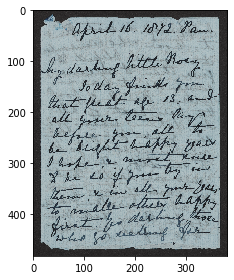

In [299]:
io.imshow(makethumb(img))
#showbriefly(img)

#### Convert to grayscale

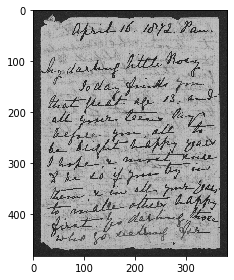

In [300]:
grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

io.imshow(makethumb(grey))
#showbriefly(grey)

### Use cv.threshold() to isolate writing
* note that **cv.threshold()** returns two arguments:
 * **ret** the threshold mask pattern (temporary variable)
 * **thresh** the image with threshold applied

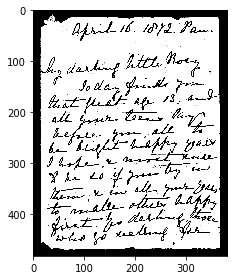

In [301]:
ret,thresh = cv.threshold(grey,64,255,cv.THRESH_OTSU)

io.imshow(makethumb(thresh))
#showbriefly(thresh)

## Crop the margins
### Find the outer boundary of the object

From: https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv

(not *yet* working, can't quite work out why...)

In [302]:
_, cropthresh = cv.threshold(thresh,1,255,cv.THRESH_BINARY)

contours,hierarchy = cv.findContours(cropthresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

#### Find contour with maximal area (largest item on page)

In [303]:
maxc = []
maxa = 0
for c in contours:
    a = cv.contourArea(c)
    if a>maxa:
        maxc=c
        maxa=a
        print('new maximum: '+str(maxa))


cont = maxc

x,y,w,h = cv.boundingRect(cont)

new maximum: 2.5
new maximum: 3.5
new maximum: 9.5
new maximum: 22.5
new maximum: 15894224.0


#### Contour results:

In [304]:
print(cont)
print('x,y,x`,y` = ',x,y,x+w,y+h)
print('w,h = ',w,h)

#print(hierarchy)

[[[383  84]]

 [[382  85]]

 [[383  86]]

 ...

 [[386  86]]

 [[385  85]]

 [[384  85]]]
x,y,x`,y` =  143 84 3672 4724
w,h =  3529 4640


#### Print the image

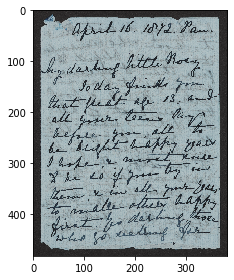

In [305]:
#cv.drawContours(img,contours,-1,(255,0,255),10)
#cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
io.imshow(makethumb(img))
#showbriefly(img)

### Do the crop

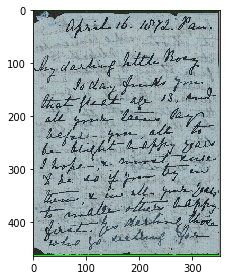

In [306]:
crop2 = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),20)
crop2 = cv.rectangle(img,(10,10),(30,30),(0,255,0),2)
crop2img = crop2[y:y+h,x:x+w]
crop = img[y:y+h,x:x+w]

io.imshow(makethumb(crop2img))
showbriefly(crop2img)

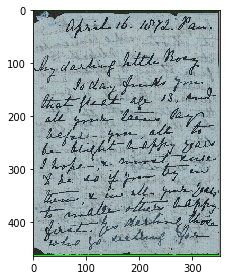

In [307]:
io.imshow(makethumb(crop))
#showbriefly(crop)

### Write the output image

In [308]:
print('Writing to: '+'../outputs/'+fname+'-processed.jpg')
result = cv.imwrite(img=crop, filename='../outputs/'+fname+'-processed.jpg')

Writing to: ../outputs/uoedh_culver house letters12659-processed.jpg


#### Remove any stray image windows

In [309]:
cv.destroyAllWindows()
